In [1]:
import pandas as pd
import seaborn as sns
import sklearn
#from pandas_profiling import ProfileReport

In [2]:
import numpy as np
sns.set_style('dark')

In [3]:
data=pd.read_csv('houses_to_rent.csv')

In [4]:
data

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"
5,5,1,13,1,1,0,2,acept,not furnished,R$0,"R$2,200",R$42,R$28,"R$2,270"
6,6,1,55,1,1,1,2,acept,furnished,"R$1,950","R$5,000",R$375,R$64,"R$7,389"
7,7,1,55,2,2,1,2,acept,not furnished,R$600,"R$1,300",R$67,R$17,"R$1,984"
8,8,1,82,3,1,1,3,acept,furnished,R$828,"R$2,000",R$109,R$26,"R$2,963"
9,9,1,32,1,1,1,16,acept,not furnished,R$533,"R$2,900",R$0,R$37,"R$3,470"


In [5]:
data.columns

Index(['Unnamed: 0', 'city', 'area', 'rooms', 'bathroom', 'parking spaces',
       'floor', 'animal', 'furniture', 'hoa', 'rent amount', 'property tax',
       'fire insurance', 'total'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 14 columns):
Unnamed: 0        6080 non-null int64
city              6080 non-null int64
area              6080 non-null int64
rooms             6080 non-null int64
bathroom          6080 non-null int64
parking spaces    6080 non-null int64
floor             6080 non-null object
animal            6080 non-null object
furniture         6080 non-null object
hoa               6080 non-null object
rent amount       6080 non-null object
property tax      6080 non-null object
fire insurance    6080 non-null object
total             6080 non-null object
dtypes: int64(6), object(8)
memory usage: 665.1+ KB


In [8]:
data.isnull().sum()

Unnamed: 0        0
city              0
area              0
rooms             0
bathroom          0
parking spaces    0
floor             0
animal            0
furniture         0
hoa               0
rent amount       0
property tax      0
fire insurance    0
total             0
dtype: int64

In [9]:
data.columns

Index(['Unnamed: 0', 'city', 'area', 'rooms', 'bathroom', 'parking spaces',
       'floor', 'animal', 'furniture', 'hoa', 'rent amount', 'property tax',
       'fire insurance', 'total'],
      dtype='object')

In [10]:
def zeross(a):
    if a=='-':
        a=0
    else:
        a=a
    return a
            

In [11]:
data['floor']=data['floor'].apply(zeross)

In [12]:
data.head()

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,0,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,4,1,19,1,1,0,0,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


In [13]:
data['floor']=data['floor'].astype('int64')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 14 columns):
Unnamed: 0        6080 non-null int64
city              6080 non-null int64
area              6080 non-null int64
rooms             6080 non-null int64
bathroom          6080 non-null int64
parking spaces    6080 non-null int64
floor             6080 non-null int64
animal            6080 non-null object
furniture         6080 non-null object
hoa               6080 non-null object
rent amount       6080 non-null object
property tax      6080 non-null object
fire insurance    6080 non-null object
total             6080 non-null object
dtypes: int64(7), object(7)
memory usage: 665.1+ KB


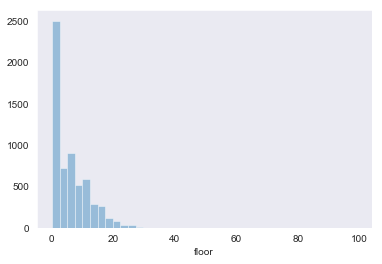

In [15]:
sns.distplot(data['floor'],kde=False,bins=40)

In [16]:
data['animal']

0           acept
1           acept
2           acept
3           acept
4       not acept
5           acept
6           acept
7           acept
8           acept
9           acept
10          acept
11          acept
12          acept
13          acept
14      not acept
15          acept
16          acept
17          acept
18          acept
19          acept
20          acept
21      not acept
22      not acept
23          acept
24          acept
25          acept
26          acept
27          acept
28          acept
29          acept
          ...    
6050    not acept
6051        acept
6052        acept
6053        acept
6054    not acept
6055        acept
6056        acept
6057        acept
6058        acept
6059        acept
6060        acept
6061        acept
6062    not acept
6063    not acept
6064    not acept
6065        acept
6066        acept
6067        acept
6068        acept
6069        acept
6070        acept
6071        acept
6072        acept
6073        acept
6074    no

In [17]:
animal_map={'acept':1,'not acept':0}
data['animal']=data['animal'].map(animal_map)
furniture_map={'furnished':1,'not furnished':0}
data['furniture']=data['furniture'].map(furniture_map)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 14 columns):
Unnamed: 0        6080 non-null int64
city              6080 non-null int64
area              6080 non-null int64
rooms             6080 non-null int64
bathroom          6080 non-null int64
parking spaces    6080 non-null int64
floor             6080 non-null int64
animal            6080 non-null int64
furniture         6080 non-null int64
hoa               6080 non-null object
rent amount       6080 non-null object
property tax      6080 non-null object
fire insurance    6080 non-null object
total             6080 non-null object
dtypes: int64(9), object(5)
memory usage: 665.1+ KB


In [19]:
dat=data.copy()

In [20]:
def inte(columns):
    for feature in columns:
        count_sem=[]
        count_inc=[]
        for i in range(0,dat.shape[0]):
            if dat[feature][i]=='Sem info':
                dat[feature][i]=str(0)
                count_sem.append(i)
            if dat[feature][i]=='Incluso':
                dat[feature][i]=str(0)
                count_inc.append(i)
            b=((dat[feature][i].split('$')))
            if len(b)>1:
                b=b[1]
                b=(b.split(','))
                if len(b)>1:
                    dat[feature][i]=int(b[0]+b[1])
                else:
                    dat[feature][i]=int(b[0])
            else:
                dat[feature][i]=int(b[0])
        dat[feature]=dat[feature].astype('int64')

In [21]:
columns=['hoa', 'rent amount', 'property tax',
       'fire insurance', 'total']

In [ ]:
inte(columns)

C:\Users\Nandhu\miniconda3\envs\study\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Nandhu\miniconda3\envs\study\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Nandhu\miniconda3\envs\study\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Nandhu\miniconda3\envs\study\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWar

In [ ]:
dat.info()

In [ ]:
#sns.pairplot(dat)

In [ ]:
dat.columns

In [ ]:
x=dat.drop(columns=['Unnamed: 0','total'])

In [ ]:
y=dat['total']

In [ ]:
dat.profile_report()

# Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [ ]:
lr=LinearRegression()
lr=lr.fit(x_train,y_train)

In [ ]:
y_predict=lr.predict(x_test)

In [ ]:
y_predict

In [ ]:
y_test=list(y_test)

In [ ]:
sns.distplot(y_test-y_predict,kde=False)